Accuracy: 0.7083333333333334


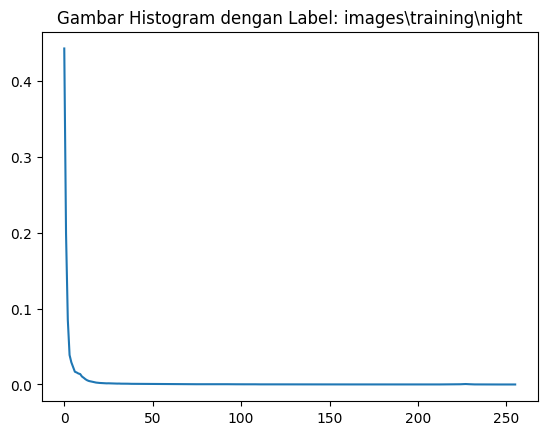

In [2]:
from pathlib import Path
import matplotlib.image as mpimg
import cv2
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Function to load dataset
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')
    img_list = []
    
    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)
            if img is not None:
                img_list.append((img, label))
                
    return img_list

# Standardize image size
def standarized_input(image):
    std_img = cv2.resize(image, (1100, 600))
    return std_img

# Extract histogram from image
def extract_histogram(image):
    gray_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    hist = cv2.calcHist([gray_img], [0], None, [256], [0, 256])
    hist = hist / hist.sum()  # Normalize histogram
    return hist.flatten()

# Load training dataset
train_dir = "images/training/"
train_img = load_dataset(train_dir)

# Extract histogram features and prepare labels
X_train = []
y_train = []
for img, label in train_img:
    hist = extract_histogram(standarized_input(img))
    X_train.append(hist)
    y_train.append(label)

# Convert to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# Check if more than one class is present
unique_labels = np.unique(y_train)
if len(unique_labels) <= 1:
    print("Kelas y_train harus lebih dari 1")
else:
    # Split dataset
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Train SVM model
    svm_model = SVC(kernel='linear')
    svm_model.fit(X_train_split, y_train_split)

    # Predict and calculate accuracy
    y_pred = svm_model.predict(X_test_split)
    accuracy = accuracy_score(y_test_split, y_pred)
    print("Accuracy:", accuracy)

    # Visualize one example histogram
    plt.plot(X_train_split[0])
    plt.title(f'Gambar Histogram dengan Label: {y_train_split[0]}')
    plt.show()
